### Section 2: Data Handling | .csv to .json ETL
https://stackoverflow.com/questions/43757965/convert-csv-to-json-tree-structure

We have some campaign statistics (https://goo.gl/etpEoA) for one of our clients. 

One of the ETL task would be to convert the data into a hierarchical representation and store it as a JSON.  A sample hierarchy is shown below with example JSON corresponding to this hierarchy to the right.

Your aim is to create a system that, given the sample data, is able to generate the hierarchy shown. Please comment on how your designed system would be able to handle large data volumes cope with the the hierarchy changes.

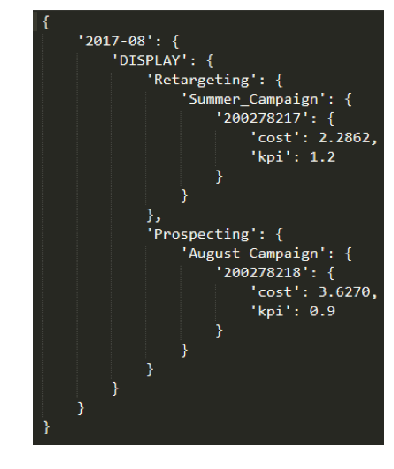

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img=mpimg.imread('json_pic.png')
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img)

In [15]:
import pandas as pd
import numpy as np

In [3]:
file_name = '../data/channel-mapping.csv'
data = pd.read_csv(file_name)
data.head()

Id conversion_month      cost    kpi  sub_channel         campaign  \
0  200278217          2017-08  2.286261  0.100  Retargeting  Summer_Campaign   
1  200278218          2017-08  3.627064  2.500  Retargeting  Summer_Campaign   
2  200278219          2017-08  2.768436  0.001  Retargeting  Summer_Campaign   
3  200278220          2017-08  5.653297  0.350  Retargeting  August Campaign   
4  200278221          2017-09  4.118470  1.500  Prospecting    Test Campaign   

   channel  
0  DISPLAY  
1  DISPLAY  
2  DISPLAY  
3  DISPLAY  
4  DISPLAY

The approach taken should involve a recusive function that reads the header of the .csv file and creates subtrees based on it; similar to:

In [94]:
import csv
from collections import defaultdict

def ctree():
    return defaultdict(ctree)


def build_leaf(name, leaf):
    res = {"name": name}
    # add children node if the leaf actually has any children
    if len(leaf.keys()) > 0:
        res["children"] = [build_leaf(k, v) for k, v in leaf.items()]

    return res

def main():
    """ 
    The first part parses the csv file and builds a tree hierarchy from it.
    The second recursively iterates over the tree and builds a custom
    json-like structure (via dict).
    
    """
    tree = ctree()

    with open(file_name) as csvfile:
        reader = csv.reader(csvfile)
        for _, row in enumerate(reader):
            
            # skipping first header row. remove this logic if your csv is headerless
            if _ == 0: continue

            # construct dynamic tree structure and grouping csv values under their parents
            leaf = tree[row[0]]
            for cid in range(1, len(row)): leaf = leaf[row[cid]]

    # building a custom tree structure
    result = []
    for name, leaf in tree.items():
        res.append(build_leaf(name, leaf))

    # printing results into the terminal
    import json
    print(res)
    print(json.dumps(res))

main()

[{'name': '200278217', 'children': [{'name': '2017-08', 'children': [{'name': '2.286261', 'children': [{'name': '0.1', 'children': [{'name': 'Retargeting', 'children': [{'name': 'Summer_Campaign', 'children': [{'name': 'DISPLAY'}]}]}]}]}]}]}, {'name': '200278218', 'children': [{'name': '2017-08', 'children': [{'name': '3.627064', 'children': [{'name': '2.5', 'children': [{'name': 'Retargeting', 'children': [{'name': 'Summer_Campaign', 'children': [{'name': 'DISPLAY'}]}]}]}]}]}]}, {'name': '200278219', 'children': [{'name': '2017-08', 'children': [{'name': '2.768436', 'children': [{'name': '0.001', 'children': [{'name': 'Retargeting', 'children': [{'name': 'Summer_Campaign', 'children': [{'name': 'DISPLAY'}]}]}]}]}]}]}, {'name': '200278220', 'children': [{'name': '2017-08', 'children': [{'name': '5.653297', 'children': [{'name': '0.35', 'children': [{'name': 'Retargeting', 'children': [{'name': 'August Campaign', 'children': [{'name': 'DISPLAY'}]}]}]}]}]}]}, {'name': '200278221', 'child

In [18]:
import csv
from collections import defaultdict

field_names_order = ['conversion_month', 'channel', 'sub_channel', 'campaign', 'Id']
end_leaves = ['cost', 'kpi']

def ctree():
    return defaultdict(ctree)

def build_leaf(leaf):
    if len(list(leaf.keys())) > 0:
        name = list(leaf.keys())[0]
        res = {str(name): build_leaf(v) for k, v in leaf.items()}
        return res

# def main():
if True:
    """ 
    The first part parses the csv file and builds a tree hierarchy from it.
    The second recursively iterates over the tree and builds a custom
    json-like structure (via dict).
    
    """
    out = []
    
    with open(file_name) as csvfile:
        reader = csv.reader(csvfile)
        for _, row in enumerate(reader):
            tree = ctree()
            
            # read columns headers
            if _ == 0: 
                field_names = row
                continue

            # construct dynamic tree structure and grouping csv values under their parents
            leaf = tree[row[field_names.index(field_names_order[0])]]
                
            for _, field_name in enumerate(field_names_order): 
                    if _ == 0: continue
                    level = field_names.index(field_name)
                    leaf = leaf[row[level]]

            out.append(tree)

    res = []
    for i in out:
        dic = {}
        for name, leaf in i.items():
            dic[name] = build_leaf(leaf)
        res.append(dic)

In [111]:
main()

[{'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}, {'2017-08': {'DISPLAY': {'Prospecting': {'August Campaign': {'200278224': None}}}}}]


#### How your designed system would be able to handle large data volumes cope with the the hierarchy changes?
[This is my weakest area but some intuitive ideas are:]
   
**Approach 1**
   
Using a config file with a predetermined lists of potential values or field formats (e.g. strings, timestamp, or int/float values) by hierarchy level. Each field would be allocated in the .json hierarchy based on this file. 

A unique or customize criteria (by field format) can be stablished for all the new fields entries.

**Approach 2**

If the .json structure and fields can change completely, other way would be by using a dynamic pivot table that creates the .json hierarchy based on the number of unique values per field.

### Section 2: Data Handling | Targetting a marketing campaign

We have a list of potential customers for the company (https://goo.gl/dU9FU1). 
- We have very limited information about the people but we know they belong to one or more clubs (customers.csv). 
- A club accepts people with a credit score, an income and a trading possibility above a certain threshold. 
- There are clubs that are more exclusive than others and there are customers that belong to all the possible clubs (clubs.csv). 
- We know that a customer belongs to a certain club because they participate in events organised by a certain club in a certain location (events.csv, locations.csv). 

The company is going to run a marketing campaign to attract new customer and the goal is to **prioritise the people with highest spending power**. The marketing campaign consists of billboards so we would also like to know what **locations have the highest potential visibility**. 

You should present the initial results of your analysis and your proposals for extending this analysis over a longer period of time and involving others from the company and the data science team. 

- What kind of analysis did you run? 
- What is the thought process that led your analysis? 
- What are the results and why they are useful for the company? 
- Do you have any suggestions on how to improve this?

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import random, math
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0)

In [2]:
file_names = ['clubs', 'customers', 'events', 'locations']

data = {i: pd.read_csv('../data/customers/' + i + '.csv') for i in file_names}

for i in file_names: print(i, data[i].shape)

clubs (600, 7)
customers (6722, 4)
events (65499, 4)
locations (4459, 3)


In [3]:
data['clubs'].head(3)

club_id        date  group  net_worth(Millions)  trade_potential  \
0       10  1990-03-25      1                 30.3          50816.0   
1       12  1990-04-29      1                 30.4          62561.0   
2       14  1990-10-11      2                 33.6          59575.0   

   credit_score  popularity  
0           7.4      1511.0  
1           8.3      1716.0  
2           8.2      1638.0

In [4]:
data['customers'].head(3) # useless? to give the results n terms of customer name instead of id? no duplicates

customer_id              name   normalized_name gender
0            7          Children          children    NaN
1           12  Mechanical Santa  mechanical santa    NaN
2           13        Tattoo Man        tattoo man    NaN

In [5]:
data['events'].head(3)

event_id  club_id  customer_id  location_id
0      9549       32        464.0          3.0
1      9550       32          9.0          3.0
2      9551       32        464.0          3.0

In [6]:
data['locations'].head(3) # useless = for the billboard; to target the (give the results in terms of) locations 

location_id                           name                normalized_name
0            1                         Street                         street
1            2                            Car                            car
2            3  Springfield Elementary School  springfield elementary school

In [7]:
locations = data['locations']
customers = data['customers']
clubs = data['clubs']
events = data['events']

# merge clubs in events
events_clubs = pd.merge(events, clubs, on='club_id')
# print(events_clubs.shape)

print('From a total of %d clubs only %d organised events' 
      %(clubs.shape[0], len(pd.unique(events_clubs.club_id))))

print('From a total of %d customers only %d participated in events, across a total of %d events.' 
      %(customers.shape[0], len(pd.unique(events_clubs.customer_id)), events.shape[0]))

print('Total number of events: %d, across %d different locations' 
      %(events.shape[0], len(pd.unique(events_clubs.location_id))))

events_clubs.head()

From a total of 600 clubs only 244 organised events
From a total of 6722 customers only 2982 participated in events, across a total of 65499 events.
Total number of events: 65499, across 1989 different locations


event_id  club_id  customer_id  location_id        date  group  \
0      9549       32        464.0          3.0  1991-04-25      2   
1      9550       32          9.0          3.0  1991-04-25      2   
2      9551       32        464.0          3.0  1991-04-25      2   
3      9552       32          9.0          3.0  1991-04-25      2   
4      9553       32         40.0          3.0  1991-04-25      2   

   net_worth(Millions)  trade_potential  credit_score  popularity  
0                 17.7          52770.0           8.5      1684.0  
1                 17.7          52770.0           8.5      1684.0  
2                 17.7          52770.0           8.5      1684.0  
3                 17.7          52770.0           8.5      1684.0  
4                 17.7          52770.0           8.5      1684.0

Note: based on the 'events.csv' file there is only one customer_id associated with each each event_id. 
It can be assumed:
    - that this is correct: 'only one customer_id attend each event_id', leading to 2982 customers out of 6722 
        participating in events.
    - the customer_id field in the events table serves only to relate each customer_id with club_id, and is not
        representative of the number of customers attending each event.

For simplicity I will assume the latter.
        
#### Approach taken:

**(1) Which people have the highest spending power?**
    - The 'link' between customers and wealth information by club, is by event -> merge events and club tables.
    - Aggregate that table by customer_id so we have info about which clubs each customer belongs to.
    - We have then a table with unique customers: some of them belong to a large number of clubs, others only to one club.
        
    It is fair to assume that:
    
    a. The credit score criteria is equal accross clubs, so we can estimate the customer credit score, 
        as well as its income (net_worth) and trade_potential, by taking the highest threshold value of the clubs 
        he/she belongs to.

    b. There is no need to estimate a potential 'shared wallet' of each customer by club. Meaning that the spending
        power of each customer on my campaign''s products or services is not affected by the number of clubs a   
        customer belongs to. [Otherwise the ranking score could be slightly normalized by the number of clubs per 
        customer].
        
    c. trade_potential metric is calculated based on the net_worth and credit_score.
    
**(2) Which locations have the highest visibility?**
    - Find which customers attend the highest number of events
    - Find which clubs are running the highest number of events
    - Find which locations are hosting the highest number of events

#### Which people have the highest spending power?

In [8]:
## customer attending the highest num. of events

customers_clubs = pd.pivot_table(events_clubs[['customer_id', 'club_id', 'net_worth(Millions)', 
                                               'trade_potential', 'credit_score', 'popularity']], 
                                 index=['customer_id', 'club_id'])

customers_clubs.head()

credit_score  net_worth(Millions)  popularity  \
customer_id club_id                                                  
1.0         32                8.5                 17.7      1684.0   
            33                7.9                 19.7      1246.0   
            34                8.4                 21.0      1379.0   
            35                8.0                 17.3      1223.0   
            36                8.6                 22.9      1798.0   

                     trade_potential  
customer_id club_id                   
1.0         32               52770.0  
            33               51997.0  
            34               50403.0  
            35               52829.0  
            36               55238.0

In [9]:
customers_wealth = pd.pivot_table(events_clubs[['customer_id', 'net_worth(Millions)', 
                                               'trade_potential', 'credit_score']], 
                                 index=['customer_id'],
                                 aggfunc=np.max)

customers_wealth.reset_index(inplace=True)

print('Unique credit_score values:', len(pd.unique(customers_wealth.credit_score)))
print('Unique net_worth values:', len(pd.unique(customers_wealth['net_worth(Millions)'])))
print('Unique trade_potential values:', len(pd.unique(customers_wealth.trade_potential)))

# We can rank the cutomers by trade_potential or net_worth, which should depend on how trade_potential metric is calculated.  
# Note: the highest variability of values is terms of trade_potential. 
    
customers_wealth.sort_values(by='trade_potential', ascending=False, inplace=True)
customers_wealth.head()

## if required, we can retrieve name and gender (when available) of each customer being targetted using the customer ('customers.csv') table.

customers_wealth_named = pd.merge(customers_wealth, customers[['customer_id', 'name', 'gender']], on='customer_id')
customers_wealth_named.head()

Unique credit_score values: 27
Unique net_worth values: 139
Unique trade_potential values: 230


customer_id  credit_score  net_worth(Millions)  trade_potential  \
0          1.0           9.2                 28.6         119295.0   
1       1521.0           9.0                 22.2         119295.0   
2         71.0           9.2                 28.6         119295.0   
3         31.0           9.1                 28.6         119295.0   
4         33.0           9.2                 28.6         119295.0   

             name gender  
0   Marge Simpson      f  
1           Sloth    NaN  
2    Chief Wiggum      m  
3  Grampa Simpson      m  
4       Announcer      m

In [10]:
print('Total number of customers we have wealth information from:', len(pd.unique(customers_wealth.customer_id)))

print('\nPotential target groups: ')
print('Number of customers with trade potential (unknown unit) above average:',
      len(customers_wealth.trade_potential[customers_wealth.trade_potential > 
                                           round(customers_wealth.trade_potential.mean())]))
print('Number of customers with trade potential (unknown unit) above median:',
      len(customers_wealth.trade_potential[customers_wealth.trade_potential > 
                                           round(customers_wealth.trade_potential.median())]))
print('Number of customers with trade potential (unknown unit) above 90th percentile:',
      len(customers_wealth.trade_potential[customers_wealth.trade_potential > 
                                           round(np.percentile(customers_wealth.trade_potential, 90))]))

Total number of customers we have wealth information from: 2981

Potential target groups: 
Number of customers with trade potential (unknown unit) above average: 1342
Number of customers with trade potential (unknown unit) above median: 1471
Number of customers with trade potential (unknown unit) above 90th percentile: 271


#### Which locations have the highest potential visibility?

In [12]:
# how many events attended by each customer
events_per_customer = pd.pivot_table(events[['customer_id', 'event_id']], index=['customer_id'], aggfunc=len)
events_per_customer.reset_index(inplace=True)
events_per_customer.columns = ['customer_id', 'n_events']
events_per_customer.sort_values(by='n_events', ascending=False, inplace=True)
events_per_customer.head()

customer_id  n_events
1           2.0     12804
7           8.0      6123
0           1.0      5487
8           9.0      4712
12         15.0      1556

In [13]:
# how many events run by each club
events_per_club = pd.pivot_table(events[['club_id', 'event_id']], index=['club_id'], aggfunc=len)
events_per_club.reset_index(inplace=True)
events_per_club.columns = ['club_id', 'n_events']
events_per_club.sort_values(by='n_events', ascending=False, inplace=True)
events_per_club.head()

club_id  n_events
196      228       394
199      231       376
223      255       360
195      227       357
204      236       347

In [14]:
# how many events run in each location
events_per_location = pd.pivot_table(events[['location_id', 'event_id']], index=['location_id'], aggfunc=len)
events_per_location.reset_index(inplace=True)
events_per_location.columns = ['location_id', 'n_events']
events_per_location.sort_values(by='n_events', ascending=False, inplace=True)
events_per_location = pd.merge(events_per_location, locations[['location_id', 'name']], on='location_id')
events_per_location.head()

location_id  n_events                             name
0          5.0     15459                     Simpson Home
1          3.0      2609    Springfield Elementary School
2         10.0      1844  Springfield Nuclear Power Plant
3         15.0      1782                     Moe's Tavern
4        136.0       784                      Kwik-E-Mart

In [15]:
print('Total number of customers we have wealth information from:', len(pd.unique(customers_wealth.customer_id)))

print('\nPotential target groups: ')
print('Number of customers with trade potential (unknown unit) above average:',
      len(customers_wealth.trade_potential[customers_wealth.trade_potential > 
                                           round(customers_wealth.trade_potential.mean())]))
print('Number of customers with trade potential (unknown unit) above median:',
      len(customers_wealth.trade_potential[customers_wealth.trade_potential > 
                                           round(customers_wealth.trade_potential.median())]))
print('Number of customers with trade potential (unknown unit) above 90th percentile:',
      len(customers_wealth.trade_potential[customers_wealth.trade_potential > 
                                           round(np.percentile(customers_wealth.trade_potential, 90))]))

Total number of customers we have wealth information from: 2981

Potential target groups: 
Number of customers with trade potential (unknown unit) above average: 1342
Number of customers with trade potential (unknown unit) above median: 1471
Number of customers with trade potential (unknown unit) above 90th percentile: 271


In [16]:
customers_per_club = pd.pivot_table(events_clubs[['customer_id', 'club_id', 'net_worth(Millions)', 
                                               'trade_potential', 'credit_score', 'popularity']], 
                                    index=['club_id'], 
                                    aggfunc={'customer_id': len})

customers_per_club.reset_index(inplace=True)
customers_per_club.columns = ['club_id', 'n_customers']
customers_per_club.sort_values(by='n_customers', ascending=False, inplace=True)
customers_per_club = pd.merge(customers_per_club, clubs, on='club_id')
customers_per_club.head()

club_id  n_customers        date  group  net_worth(Millions)  \
0      228        394.0  1999-10-03     11                  7.1   
1      231        376.0  1999-11-07     11                  8.4   
2      255        360.0  2000-12-10     12                 16.8   
3      227        357.0  1999-09-26     11                  8.1   
4      236        347.0  2000-01-09     11                 10.0   

   trade_potential  credit_score  popularity  
0          44172.0           7.5       776.0  
1          51431.0           7.6       817.0  
2          49325.0           7.3       766.0  
3          34394.0           7.3       917.0  
4          48194.0           7.3       715.0

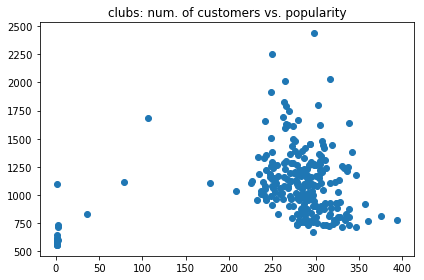

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(customers_per_club['n_customers'], customers_per_club['popularity'])
plt.title('clubs: num. of customers vs. popularity')
plt.tight_layout()

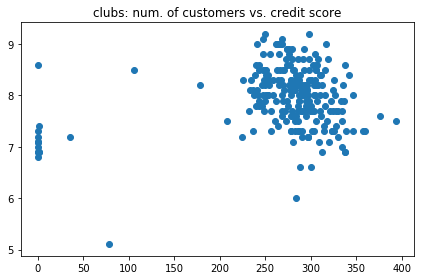

In [18]:
plt.scatter(customers_per_club['n_customers'], customers_per_club['credit_score'])
plt.title('clubs: num. of customers vs. credit score')
plt.tight_layout()

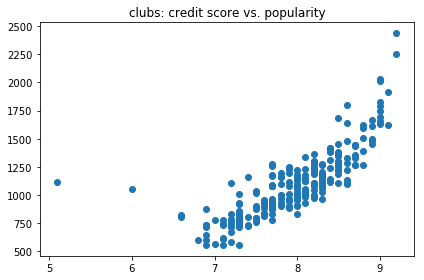

In [19]:
plt.scatter(customers_per_club['credit_score'], customers_per_club['popularity'])
plt.title('clubs: credit score vs. popularity')
plt.tight_layout()

#### Comments

- All the clubs have a similar amount of customers [between ~250 to ~350] independently of the credit score 
(with the exception of a handful of clubs)
- Clubs popularity is not corelated with the amount of customers belonging to that club
- Clubs demanding high credit scores have a higher popularity.

Therefore it may make more sense to target those locations hosting either:
- the highest number of events; or
- events of clubs with the highest number of customers, instead of those with the highest popularity rate.